In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx

In [2]:
transaction_data = pd.read_csv(r'C:\Users\alons\retailer_mb\Market Basket Analysis.csv')

transaction_data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
transaction_data['Date'] = pd.to_datetime(transaction_data['Date'])
transaction_data['month'] = transaction_data['Date'].dt.month
print(transaction_data.head())

   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   Price  CustomerID         Country  month  
0   2.55     17850.0  United Kingdom     12  
1   3.39     17850.0  United Kingdom     12  
2   2.75     17850.0  United Kingdom     12  
3   3.39     17850.0  United Kingdom     12  
4   3.39     17850.0  United Kingdom     12  


In [4]:
transaction_data.dtypes

BillNo                 int64
Itemname              object
Quantity               int64
Date          datetime64[ns]
Price                float64
CustomerID           float64
Country               object
month                  int32
dtype: object

In [5]:
transaction_data.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134038
Country            0
month              0
dtype: int64

In [6]:
transaction_data.dropna(subset=['Itemname'], inplace=True)
transaction_data.isnull().sum()

BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    132583
Country            0
month              0
dtype: int64

In [7]:
#makes non account holders 0 value in 'customerid'
transaction_data['CustomerID'].fillna(0, inplace=True)

# Converts those with customerid and account holders to a 1 value
transaction_data['CustomerID'] = transaction_data['CustomerID'].apply(lambda x: 1 if x != 0 else 0)

transaction_data.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
month         0
dtype: int64

In [8]:
transaction_data['Total'] = transaction_data['Quantity'] * transaction_data['Price']
transaction_data[:5]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,month,Total
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,1,United Kingdom,12,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,1,United Kingdom,12,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,1,United Kingdom,12,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,1,United Kingdom,12,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,1,United Kingdom,12,20.34


In [9]:
#gathers data from the month of August 

In [10]:
august_data=transaction_data[transaction_data['Date'].dt.month ==8]
print(august_data)

        BillNo                             Itemname  Quantity  \
274931  561904          6 RIBBONS ELEGANT CHRISTMAS        96   
274932  561904            SCANDINAVIAN REDS RIBBONS       156   
274933  561905      IVORY HANGING DECORATION  HEART        24   
274934  561905     SINGLE HEART ZINC T-LIGHT HOLDER        12   
274935  561905    HANGING HEART ZINC T-LIGHT HOLDER        12   
...        ...                                  ...       ...   
308660  565067  CERAMIC HEART FAIRY CAKE MONEY BANK         2   
308661  565067                 PIGGY BANK RETROSPOT         2   
308662  565067   CERAMIC STRAWBERRY CAKE MONEY BANK         2   
308663  565067                       FUNKY DIVA PEN        48   
308668  565076  BUNDLE OF 3 ALPHABET EXERCISE BOOKS         1   

                      Date  Price  CustomerID         Country  month   Total  
274931 2011-08-01 08:30:00   1.45           1  United Kingdom      8  139.20  
274932 2011-08-01 08:30:00   1.06           1  United Kingdom

In [11]:
unique_item_count = august_data['Itemname'].nunique()
print("total unique items sold:", unique_item_count)

total unique items sold: 2579


In [12]:
items_count= august_data['Itemname'].value_counts()
print(items_count)

Itemname
JUMBO BAG RED RETROSPOT               171
SPOTTY BUNTING                        167
LUNCH BAG RED RETROSPOT               159
PARTY BUNTING                         154
WHITE HANGING HEART T-LIGHT HOLDER    149
                                     ... 
HEART GARLAND RUSTIC PADDED             1
ASSORTED EASTER GIFT TAGS               1
PINK/WHITE "KEEP CLEAN" BULLET BIN      1
FAUX FUR CHOCOLATE THROW                1
PACK/12 XMAS FUN CARD                   1
Name: count, Length: 2579, dtype: int64


In [13]:
august_data['Price'].describe()

count    33656.000000
mean         3.687668
std         30.885469
min          0.000000
25%          1.250000
50%          2.080000
75%          4.130000
max       4505.170000
Name: Price, dtype: float64

In [14]:
basket_total= august_data.groupby('BillNo')['Total'].sum()
basket_total[:5]

BillNo
561904    304.56
561905    178.50
561906    660.45
561907    211.14
561908    120.50
Name: Total, dtype: float64

In [15]:
basket_total.describe()

count     1345.000000
mean       537.683703
std       1312.671025
min          0.000000
25%        149.060000
50%        303.800000
75%        504.190000
max      21880.440000
Name: Total, dtype: float64

In [16]:
#amt of items purchased per person/basket
basket_size=august_data.groupby('BillNo')['Quantity'].sum()
basket_size[:5]

BillNo
561904    252
561905    118
561906    471
561907    250
561908     60
Name: Quantity, dtype: int64

In [17]:
basket_size.describe()

count     1345.000000
mean       303.113755
std        757.830351
min      -1060.000000
25%         72.000000
50%        172.000000
75%        323.000000
max      14730.000000
Name: Quantity, dtype: float64

In [18]:
#Combined all rows into baskets accroding to 'BillNo'
basket = (august_data.groupby(['BillNo', 'Itemname'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('BillNo'))


basket[:]

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY,amazon,damages,taig adjust no stock
BillNo,,,,,,,,,,,,,,,,,,,,,
561904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
565014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
565056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
items_frequency= items_count/len(basket)
items_frequency[:11]

Itemname
JUMBO BAG RED RETROSPOT               0.127138
SPOTTY BUNTING                        0.124164
LUNCH BAG RED RETROSPOT               0.118216
PARTY BUNTING                         0.114498
WHITE HANGING HEART T-LIGHT HOLDER    0.110781
LUNCH BAG SUKI DESIGN                 0.106320
REGENCY CAKESTAND 3 TIER              0.097398
SET OF 3 REGENCY CAKE TINS            0.096654
LUNCH BAG APPLE DESIGN                0.096654
LUNCH BAG CARS BLUE                   0.091450
LUNCH BAG PINK POLKADOT               0.089963
Name: count, dtype: float64

C:\Users\alons\AppData\Local\Temp\ipykernel_17880\2051007553.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


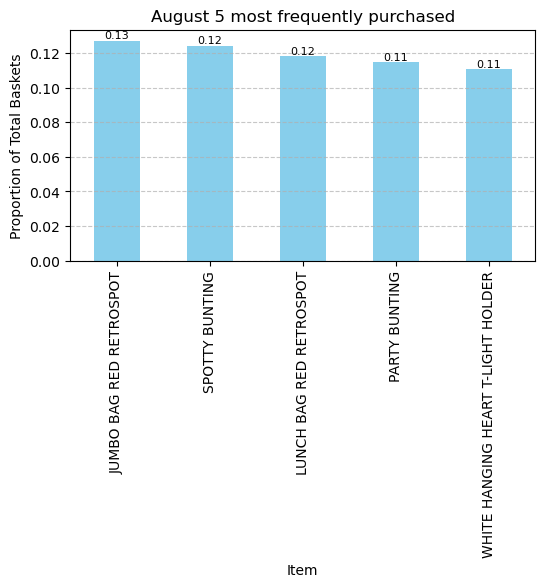

In [20]:
plt.figure(figsize=(6, 3))
ax = items_frequency[:5].plot(kind='bar', color='skyblue', width=0.5)
plt.title('August 5 most frequently purchased')
plt.xlabel('Item')
plt.ylabel('Proportion of Total Baskets')
plt.xticks(rotation=90)

# Add annotations above each bar
for i, v in enumerate(items_frequency[:5]):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
#Tells us if the item was purchased or not making it the values binary
basket_sets = basket.apply(lambda x: x > 0, axis=1)

basket_sets

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY,amazon,damages,taig adjust no stock
BillNo,,,,,,,,,,,,,,,,,,,,,
561904,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
561905,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
561906,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
561907,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
561908,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565056,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# set parameters
min_support= .03
min_confidence = .5
max_length = 2

In [23]:
# Generate frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=min_support,  use_colnames=True)
print(frequent_itemsets)

      support                                           itemsets
0    0.060967                           (6 RIBBONS RUSTIC CHARM)
1    0.037175                      (60 TEATIME FAIRY CAKE CASES)
2    0.058736                       (ALARM CLOCK BAKELIKE GREEN)
3    0.032714                      (ALARM CLOCK BAKELIKE ORANGE)
4    0.043123                        (ALARM CLOCK BAKELIKE PINK)
..        ...                                                ...
270  0.030483  (LUNCH BAG CARS BLUE, LUNCH BAG RED RETROSPOT,...
271  0.035688  (LUNCH BAG SUKI DESIGN, LUNCH BAG CARS BLUE, L...
272  0.031970  (LUNCH BAG SUKI DESIGN, LUNCH BAG CARS BLUE, L...
273  0.034944  (LUNCH BAG SUKI DESIGN, LUNCH BAG PINK POLKADO...
274  0.032714  (LUNCH BAG SUKI DESIGN, LUNCH BAG RED RETROSPO...

[275 rows x 2 columns]


In [24]:
# Generate association rules
selected_columns = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)[selected_columns]
rules[:20]

,antecedents,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.035688,0.738462,12.572541
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.035688,0.607595,12.572541
2,(RED RETROSPOT CHARLOTTE BAG),(CHARLOTTE BAG SUKI DESIGN),0.033457,0.542169,9.594959
3,(CHARLOTTE BAG SUKI DESIGN),(RED RETROSPOT CHARLOTTE BAG),0.033457,0.592105,9.594959
4,(CHARLOTTE BAG SUKI DESIGN),(WOODLAND CHARLOTTE BAG),0.031970,0.565789,10.283606
5,(WOODLAND CHARLOTTE BAG),(CHARLOTTE BAG SUKI DESIGN),0.031970,0.581081,10.283606
6,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.039405,0.697368,13.027230
7,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.039405,0.736111,13.027230
8,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.036431,0.662162,12.369557
9,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.036431,0.680556,12.369557


In [25]:
rules['itemsets'] = rules['antecedents'].apply(lambda x: ', '.join(map(str, x))) + ' -> ' + rules['consequents'].apply(lambda x: ', '.join(map(str, x)))


In [26]:
#by support
rules.sort_values(by="support", ascending= False)

,antecedents,consequents,support,confidence,lift,itemsets
73,(PARTY BUNTING),(SPOTTY BUNTING),0.063197,0.555556,4.528620,PARTY BUNTING -> SPOTTY BUNTING
74,(SPOTTY BUNTING),(PARTY BUNTING),0.063197,0.515152,4.528620,SPOTTY BUNTING -> PARTY BUNTING
61,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.058736,0.512987,5.749729,LUNCH BAG RED RETROSPOT -> LUNCH BAG PINK POLK...
60,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.058736,0.658333,5.749729,LUNCH BAG PINK POLKADOT -> LUNCH BAG RED RETRO...
64,(LUNCH BAG SUKI DESIGN),(LUNCH BAG RED RETROSPOT),0.055019,0.540146,4.717509,LUNCH BAG SUKI DESIGN -> LUNCH BAG RED RETROSPOT
...,...,...,...,...,...,...
98,"(LUNCH BAG BLACK SKULL., LUNCH BAG SUKI DESIGN)",(LUNCH BAG APPLE DESIGN),0.030483,0.577465,6.067892,"LUNCH BAG BLACK SKULL., LUNCH BAG SUKI DESIGN..."
72,(LUNCH BAG VINTAGE LEAF DESIGN),(LUNCH BAG VINTAGE DOILY),0.030483,0.525641,6.312386,LUNCH BAG VINTAGE LEAF DESIGN -> LUNCH BAG VIN...
121,"(LUNCH BAG ALPHABET DESIGN, LUNCH BAG SPACEBOY...",(LUNCH BAG SUKI DESIGN),0.030483,0.745455,7.318514,"LUNCH BAG ALPHABET DESIGN, LUNCH BAG SPACEBOY ..."
120,"(LUNCH BAG SUKI DESIGN, LUNCH BAG SPACEBOY DES...",(LUNCH BAG ALPHABET DESIGN),0.030483,0.611940,8.850104,"LUNCH BAG SUKI DESIGN, LUNCH BAG SPACEBOY DESI..."


C:\Users\alons\AppData\Local\Temp\ipykernel_17880\3879744878.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlapping labels


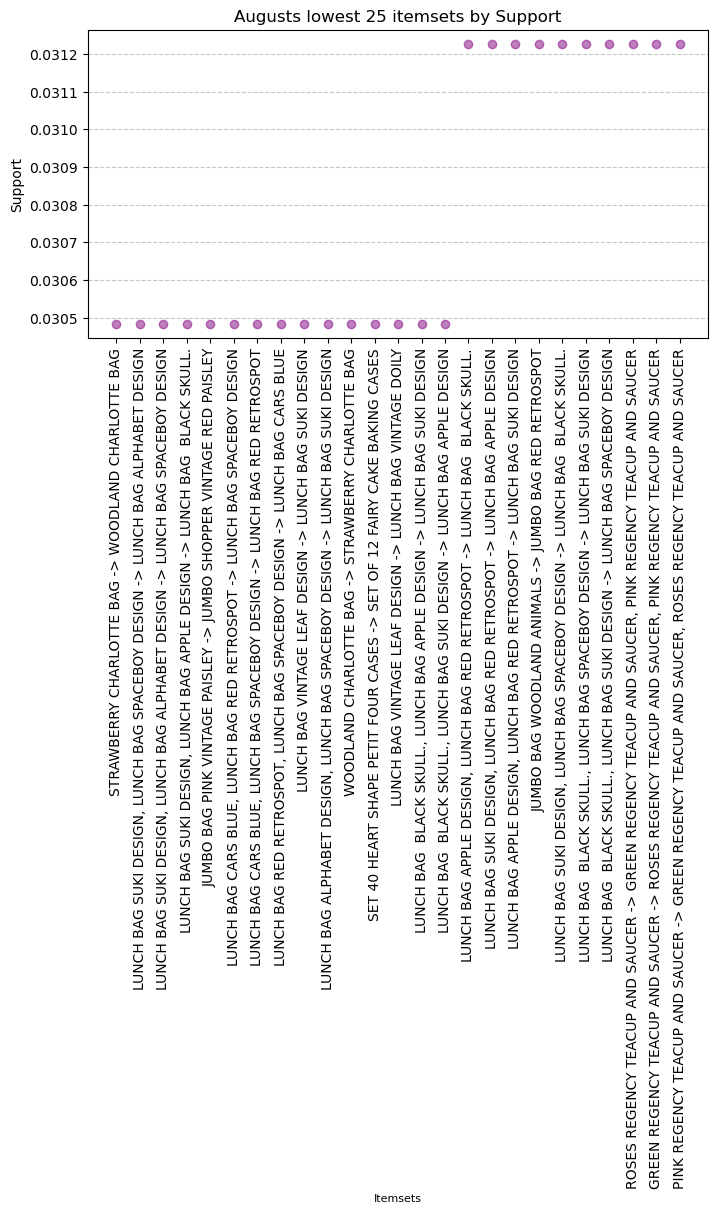

In [27]:
lowest_25_rules = rules.sort_values(by='support', ascending=True).head(25)

# Plot the lowest 25 rules by confidence
plt.figure(figsize=(8, 4))
plt.scatter(lowest_25_rules['itemsets'], lowest_25_rules['support'], color='purple', alpha=0.5)  # Adjust color and transparency as needed
plt.xlabel('Itemsets', fontsize=8)
plt.ylabel('Support')
plt.title('Augusts lowest 25 itemsets by Support')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [28]:
#by confidence
rules.sort_values(by="confidence", ascending= True)[:11]

,antecedents,consequents,support,confidence,lift,itemsets
25,(JUMBO BAG VINTAGE DOILY),(JUMBO BAG RED RETROSPOT),0.040149,0.500000,4.002976,JUMBO BAG VINTAGE DOILY -> JUMBO BAG RED RETRO...
17,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG APPLES),0.036431,0.500000,5.797414,JUMBO SHOPPER VINTAGE RED PAISLEY -> JUMBO BAG...
38,(LUNCH BAG SPACEBOY DESIGN),(LUNCH BAG BLACK SKULL.),0.043123,0.504348,5.797845,LUNCH BAG SPACEBOY DESIGN -> LUNCH BAG BLACK ...
47,(LUNCH BAG ALPHABET DESIGN),(LUNCH BAG WOODLAND),0.034944,0.505376,6.535877,LUNCH BAG ALPHABET DESIGN -> LUNCH BAG WOODLAND
62,(LUNCH BAG PINK POLKADOT),(LUNCH BAG SUKI DESIGN),0.045353,0.508333,4.990572,LUNCH BAG PINK POLKADOT -> LUNCH BAG SUKI DESIGN
41,(LUNCH BAG WOODLAND),(LUNCH BAG BLACK SKULL.),0.039405,0.509615,5.858399,LUNCH BAG WOODLAND -> LUNCH BAG BLACK SKULL.
32,(LUNCH BAG BLACK SKULL.),(LUNCH BAG APPLE DESIGN),0.044610,0.512821,5.388622,LUNCH BAG BLACK SKULL. -> LUNCH BAG APPLE DESIGN
61,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.058736,0.512987,5.749729,LUNCH BAG RED RETROSPOT -> LUNCH BAG PINK POLK...
69,(LUNCH BAG SPACEBOY DESIGN),(LUNCH BAG WOODLAND),0.043866,0.513043,6.635033,LUNCH BAG SPACEBOY DESIGN -> LUNCH BAG WOODLAND
74,(SPOTTY BUNTING),(PARTY BUNTING),0.063197,0.515152,4.528620,SPOTTY BUNTING -> PARTY BUNTING


C:\Users\alons\AppData\Local\Temp\ipykernel_17880\2167106201.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlapping labels


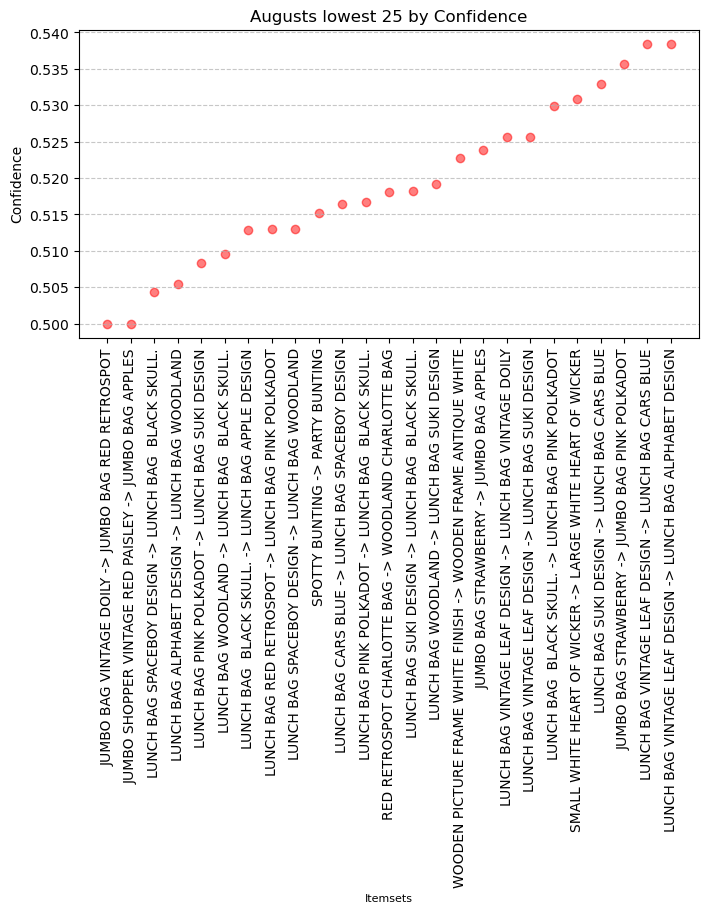

In [29]:
lowest_25_rules = rules.sort_values(by='confidence', ascending=True).head(25)

# Plot the lowest 25 rules by confidence
plt.figure(figsize=(8, 4))
plt.scatter(lowest_25_rules['itemsets'], lowest_25_rules['confidence'], color='red', alpha=0.5)  # Adjust color and transparency as needed
plt.xlabel('Itemsets', fontsize=8)
plt.ylabel('Confidence')
plt.title('Augusts lowest 25 by Confidence')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)  
plt.tight_layout() 
plt.show()

In [30]:
rules.sort_values(by="lift", ascending=False)[:11]

,antecedents,consequents,support,confidence,lift,itemsets
89,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.031227,0.777778,18.036398,"GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY..."
94,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.031227,0.724138,18.036398,PINK REGENCY TEACUP AND SAUCER -> GREEN REGENC...
91,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.031227,0.893617,17.419056,"ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY ..."
92,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.031227,0.608696,17.419056,GREEN REGENCY TEACUP AND SAUCER -> ROSES REGEN...
10,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.035688,0.695652,16.131934,GREEN REGENCY TEACUP AND SAUCER -> PINK REGENC...
11,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.035688,0.827586,16.131934,PINK REGENCY TEACUP AND SAUCER -> GREEN REGENC...
90,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.031227,0.875000,15.903716,"GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY ..."
93,(ROSES REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.031227,0.567568,15.903716,ROSES REGENCY TEACUP AND SAUCER -> GREEN REGEN...
75,(ROSES REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.034944,0.635135,14.728565,ROSES REGENCY TEACUP AND SAUCER -> PINK REGENC...
76,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.034944,0.810345,14.728565,PINK REGENCY TEACUP AND SAUCER -> ROSES REGENC...


In [31]:
rules.sort_values(by="lift", ascending=True)[:11]

,antecedents,consequents,support,confidence,lift,itemsets
25,(JUMBO BAG VINTAGE DOILY),(JUMBO BAG RED RETROSPOT),0.040149,0.500000,4.002976,JUMBO BAG VINTAGE DOILY -> JUMBO BAG RED RETRO...
26,(JUMBO BAG VINTAGE LEAF),(JUMBO BAG RED RETROSPOT),0.040149,0.540000,4.323214,JUMBO BAG VINTAGE LEAF -> JUMBO BAG RED RETROSPOT
28,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.039405,0.540816,4.329750,JUMBO SHOPPER VINTAGE RED PAISLEY -> JUMBO BAG...
18,(JUMBO BAG OWLS),(JUMBO BAG RED RETROSPOT),0.031970,0.551282,4.413538,JUMBO BAG OWLS -> JUMBO BAG RED RETROSPOT
19,(JUMBO BAG PEARS),(JUMBO BAG RED RETROSPOT),0.032714,0.564103,4.516178,JUMBO BAG PEARS -> JUMBO BAG RED RETROSPOT
73,(PARTY BUNTING),(SPOTTY BUNTING),0.063197,0.555556,4.528620,PARTY BUNTING -> SPOTTY BUNTING
74,(SPOTTY BUNTING),(PARTY BUNTING),0.063197,0.515152,4.528620,SPOTTY BUNTING -> PARTY BUNTING
48,(LUNCH BAG APPLE DESIGN),(LUNCH BAG RED RETROSPOT),0.051301,0.539062,4.708046,LUNCH BAG APPLE DESIGN -> LUNCH BAG RED RETROSPOT
64,(LUNCH BAG SUKI DESIGN),(LUNCH BAG RED RETROSPOT),0.055019,0.540146,4.717509,LUNCH BAG SUKI DESIGN -> LUNCH BAG RED RETROSPOT
63,(LUNCH BAG SPACEBOY DESIGN),(LUNCH BAG RED RETROSPOT),0.046840,0.547826,4.784585,LUNCH BAG SPACEBOY DESIGN -> LUNCH BAG RED RET...


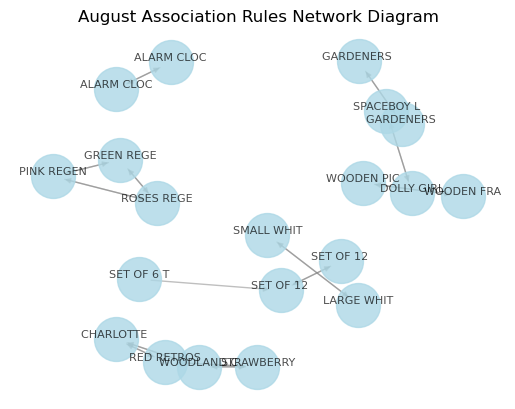

In [32]:
# Creating a threshold to get the top listed by "lift"
threshold_lift = 9
filtered_rules = rules[rules['lift'] >= threshold_lift]

# Create a directed graph
G = nx.DiGraph()

# Add nodes for antecedents and consequents
for _, row in filtered_rules.iterrows():
    for item in row['antecedents']:
        G.add_node(item)
    for item in row['consequents']:
        G.add_node(item)

# Add edges between antecedents and consequents
for _, row in filtered_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent)

# Set positions for nodes
pos = nx.spring_layout(G, scale=1000, k=1/len(G)**.1)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1, arrowsize=8, alpha=0.5)

# Add labels with adjusted positioning
nx.draw_networkx_labels(G, pos, labels={node: node[:10] for node in G.nodes()}, font_size=8, font_family='sans-serif', alpha=0.7, verticalalignment='bottom')

# Display the plot
plt.title('August Association Rules Network Diagram')
plt.axis('off')
plt.show()

C:\Users\alons\AppData\Local\Temp\ipykernel_17880\185002472.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


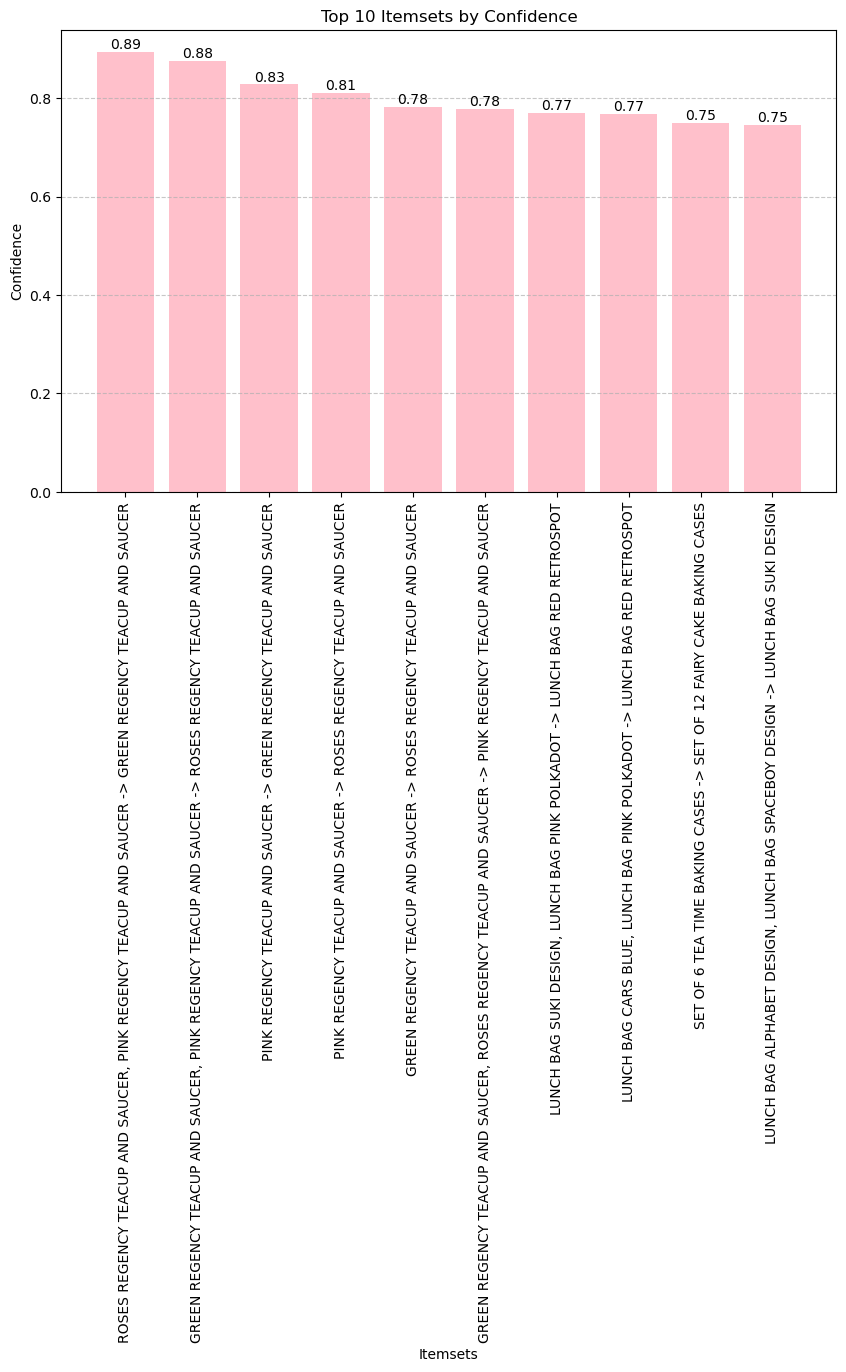

In [33]:
top_n_itemsets= rules.sort_values(by='confidence', ascending=False).head(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(top_n_itemsets['itemsets'], top_n_itemsets['confidence'], color='pink')

# Annotating each bar with its confidence value
for i in range(len(bars)):
    plt.text(bars[i].get_x() + bars[i].get_width()/2, bars[i].get_height(), round(top_n_itemsets['confidence'].iloc[i], 2), 
             ha='center', va='bottom')

plt.title(f'Top 10 Itemsets by Confidence')
plt.xlabel('Itemsets')
plt.ylabel('Confidence')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

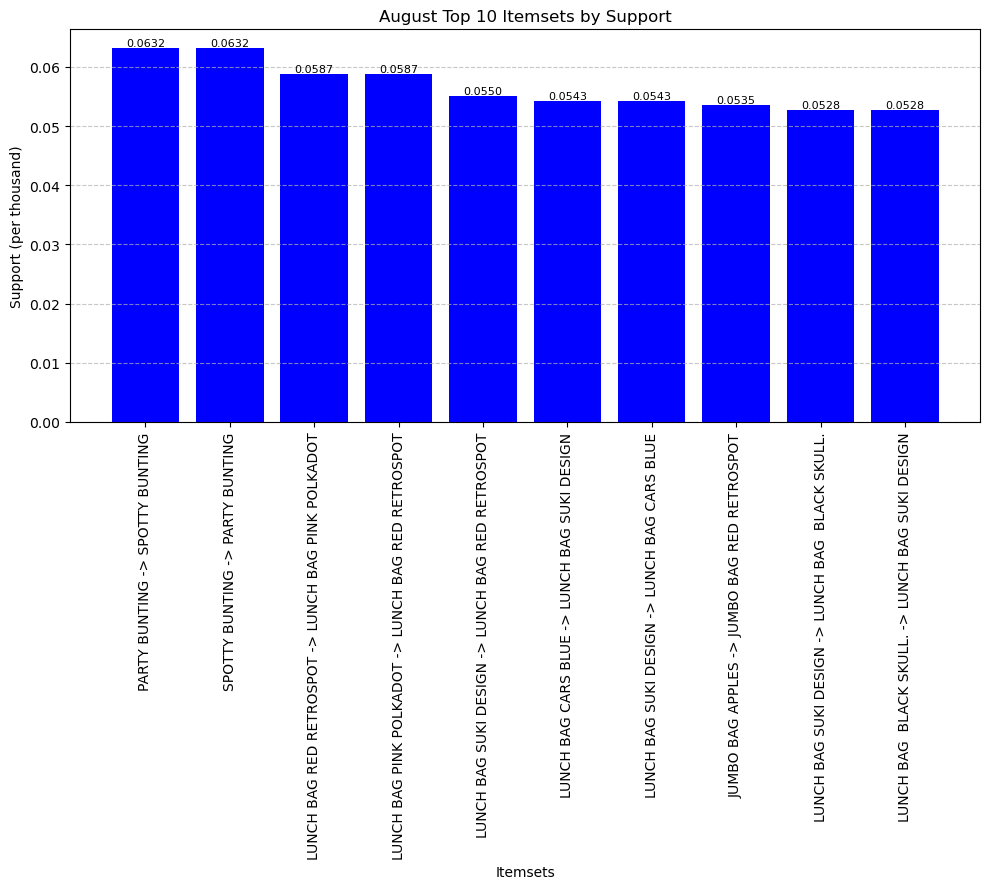

In [34]:
top_n_itemsets = rules.sort_values(by='support', ascending=False).head(10)

plt.figure(figsize=(10, 9))
bars = plt.bar(top_n_itemsets['itemsets'], top_n_itemsets['support'], color='blue')

# Add confidence values as text labels above each bar
for bar, support in zip(bars, top_n_itemsets['support']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{support * 1:.4f}', 
             ha='center', va='bottom', color='black', fontsize=8)

plt.title('August Top 10 Itemsets by Support')
plt.xlabel('Itemsets')
plt.ylabel('Support (per thousand)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()